In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Markov chain functions

In [2]:
numbers = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

def combo_maker(n_states):
    
    state_combo = []
    
    for i in numbers[0:n_states]:
        for j in range(0, n_states):
            state_combo.append(i + "_" + numbers[j])
            
    return(state_combo)

In [3]:
def list_to_matrix(trans_list, col_count):
    
    n = col_count
    trans_matrix = [trans_list[i:i+n] for i in range(0, len(trans_list), n)]

    return trans_matrix

In [4]:
def prob_initializer(combo_matrix):
    
    trans_list = []
    
    zero_list = [0] * len(combo_matrix)

    for x, y in zip(combo_matrix, zero_list):
        globals()[x] = y
        trans_list.append(globals()[x])
        
    return(trans_list)

In [5]:
def state_count(df, trans_matrix):
    
    cols = list(df)
    cols = len(cols)
    
    for i in range(0, 30):
        for j in range(2, cols):
            for x in range(1, len(trans_matrix) + 1):
                for y in range(1, len(trans_matrix) + 1):
                    if((df.loc[i][j - 1] == x) & (df.loc[i][j] == y)):
                        trans_matrix[x - 1][y - 1] += 1
                        
    return trans_matrix

In [6]:
def state_prob(trans_matrix):
    
    trans_prob_matrix = []
    
    for i in trans_matrix:
        count = sum(i)
        trans_prob_matrix.append([x / count for x in i])
        
    return(trans_prob_matrix)

In [7]:
def playoff_prob(start_state, num_years, trans_name, trans_prob_matrix):
    
    state_list = [start_state]
    i = 0
    
    prob = 1
    while i != num_years:
        for possible_state in range(len(trans_name)):
            if(start_state == possible_state):
                change = np.random.choice(trans_name[possible_state], replace = True, p = trans_prob_matrix[possible_state])
                for state in range(len(trans_name)):
                    if(change == trans_name[possible_state][state]):
                        prob = prob * trans_matrix[possible_state][state]
                        state_list.append(state)
        i += 1
    return(state_list)

In [8]:
def playoff_prob_list(start_state, years, trans_name, trans_prob_matrix, playoff_state, n_simulations):
    
    playoff_prob_list = []
    
    for i in range(1, years + 1):
        list_activity = []
        count = 0
        
        for iterations in range(1, n_simulations):
            list_activity.append(playoff_prob(start_state, i, trans_name, trans_prob_matrix))
        for states in list_activity:
            if playoff_state in states:
                count += 1
                
        percentage = count / n_simulations
        playoff_prob_list.append(percentage)
    
    return(playoff_prob_list)

# Create 3-state Markov chain

In [9]:
df_3_chain = pd.read_csv('3_state_chain_data.csv')
df_3_chain = df_3_chain.fillna(0)

df_3_chain.head()

,team,year_1,year_2,year_3,year_4,year_5,year_6,year_7,year_8,year_9,...,year_25,year_26,year_27,year_28,year_29,year_30,year_31,year_32,year_33,year_34
0,Atlanta Hawks,2,3,3,3,3,2,3,2,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
1,Boston Celtics,3,3,3,3,3,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0
2,New Jersey/Brooklyn Nets,3,3,1,1,1,1,1,3,3,...,2.0,1.0,2.0,2.0,3.0,3.0,3.0,1.0,1.0,2.0
3,Charlotte Bobcats/Hornets,1,1,1,2,3,2,3,2,3,...,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chicago Bulls,3,3,3,3,3,3,3,3,3,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,3.0,2.0


In [10]:
trans_name = combo_maker(3)
trans_list = prob_initializer(trans_name)

trans_name = list_to_matrix(trans_name, 3)

In [11]:
trans_matrix = list_to_matrix(trans_list, 3)
trans_matrix = state_count(df_3_chain, trans_matrix)

In [12]:
trans_prob_matrix = state_prob(trans_matrix)

In [13]:
trans_prob_matrix

[[0.47560975609756095, 0.3780487804878049, 0.14634146341463414],
 [0.21428571428571427, 0.37815126050420167, 0.40756302521008403],
 [0.054924242424242424, 0.17613636363636365, 0.7689393939393939]]

In [14]:
bottom_playoff = playoff_prob_list(0, 5, trans_name, trans_prob_matrix, 2, 100000)
lottery_playoff = playoff_prob_list(1, 5, trans_name, trans_prob_matrix, 2, 100000)

# Plot 3-state chain results

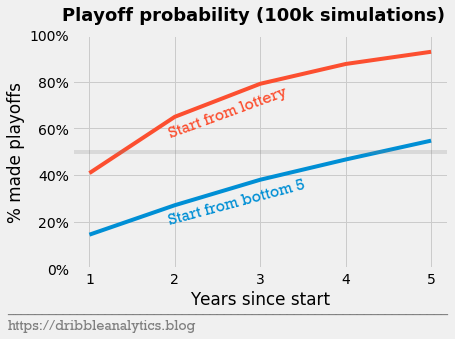

In [15]:
plt.style.use('fivethirtyeight')

three_chain_five_years, ax = plt.subplots()

x = range(1, 6)

ax.plot(x, bottom_playoff)
ax.plot(x, lottery_playoff)

ax.set_xlabel('Years since start')
ax.set_ylabel('% made playoffs')

three_chain_five_years.suptitle("Playoff probability (100k simulations)", weight = 'bold', size = 18)

ax.set_ylim([0, 1])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.axhline(y = .5, alpha = .2, color = 'grey')

three_chain_five_years.text(x = 0.3, y = 0.35,
    s = 'Start from bottom 5',
    fontsize = 16, fontname = 'Rockwell', color = 'C0', horizontalalignment='left', rotation = 15)

three_chain_five_years.text(x = 0.3, y = 0.67,
    s = 'Start from lottery',
    fontsize = 16, fontname = 'Rockwell', color = 'C1', horizontalalignment='left', rotation = 20)

three_chain_five_years.text(x = -0.07, y = -0.08,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

three_chain_five_years.text(x = -0.07, y = -.14,
    s = 'https://dribbleanalytics.blog',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

three_chain_five_years.savefig('three-chain-five-years.png', dpi = 400, bbox_inches = 'tight')

In [16]:
bottom_playoff = playoff_prob_list(0, 10, trans_name, trans_prob_matrix, 2, 100000)
lottery_playoff = playoff_prob_list(1, 10, trans_name, trans_prob_matrix, 2, 100000)

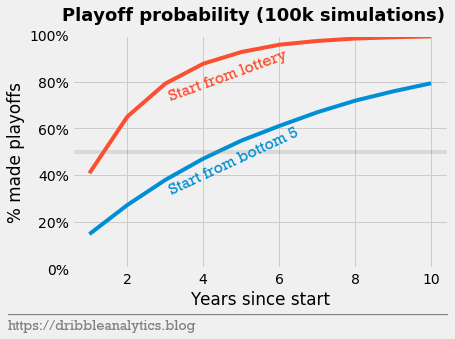

In [17]:
plt.style.use('fivethirtyeight')

three_chain_ten_years, ax = plt.subplots()

x = range(1, 11)

ax.plot(x, bottom_playoff)
ax.plot(x, lottery_playoff)

ax.set_xlabel('Years since start')
ax.set_ylabel('% made playoffs')

three_chain_ten_years.suptitle("Playoff probability (100k simulations)", weight = 'bold', size = 18)

ax.set_ylim([0, 1])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.axhline(y = .5, alpha = .2, color = 'grey')

three_chain_ten_years.text(x = 0.3, y = 0.53,
    s = 'Start from bottom 5',
    fontsize = 16, fontname = 'Rockwell', color = 'C0', horizontalalignment='left', rotation = 25)

three_chain_ten_years.text(x = 0.3, y = 0.8,
    s = 'Start from lottery',
    fontsize = 16, fontname = 'Rockwell', color = 'C1', horizontalalignment='left', rotation = 20)

three_chain_ten_years.text(x = -0.07, y = -0.08,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

three_chain_ten_years.text(x = -0.07, y = -.14,
    s = 'https://dribbleanalytics.blog',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

three_chain_ten_years.savefig('three-chain-ten-years.png', dpi = 400, bbox_inches = 'tight')

# Create 4-state Markov chain

In [18]:
df_4_chain = pd.read_csv('4_state_chain_data.csv')
df_4_chain = df_4_chain.fillna(0)

df_4_chain.head()

,team,year_1,year_2,year_3,year_4,year_5,year_6,year_7,year_8,year_9,year_10,year_11,year_12,year_13,year_14
0,Atlanta Hawks,1,1,1,4,4,4,4,4,4,4,4,4,4,1
1,Boston Celtics,4,2,1,4,4,4,4,4,4,1,4,4,4,4
2,New Jersey/Brooklyn Nets,4,4,4,2,2,1,2,2,4,4,4,1,1,2
3,Charlotte Bobcats/Hornets,1,1,2,2,3,4,2,1,1,4,2,4,3,3
4,Chicago Bulls,4,4,4,2,4,4,4,4,4,4,4,3,4,2


In [19]:
trans_name = combo_maker(4)
trans_list = prob_initializer(trans_name)

trans_name = list_to_matrix(trans_name, 4)

In [20]:
trans_matrix = list_to_matrix(trans_list, 4)
trans_matrix = state_count(df_4_chain, trans_matrix)

In [21]:
trans_prob_matrix = state_prob(trans_matrix)

In [22]:
trans_prob_matrix

[[0.49230769230769234,
  0.27692307692307694,
  0.09230769230769231,
  0.13846153846153847],
 [0.18461538461538463,
  0.3384615384615385,
  0.15384615384615385,
  0.3230769230769231],
 [0.17307692307692307, 0.1346153846153846, 0.25, 0.4423076923076923],
 [0.057692307692307696,
  0.08653846153846154,
  0.11057692307692307,
  0.7451923076923077]]

In [23]:
five_playoff = playoff_prob_list(0, 5, trans_name, trans_prob_matrix, 3, 100000)
ten_playoff = playoff_prob_list(1, 5, trans_name, trans_prob_matrix, 3, 100000)
lottery_playoff = playoff_prob_list(2, 5, trans_name, trans_prob_matrix, 3, 100000)

# Plot 4-state chain results

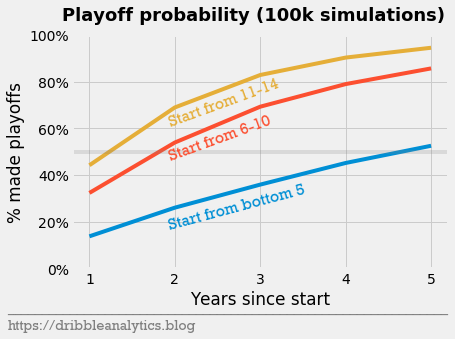

In [24]:
plt.style.use('fivethirtyeight')

four_chain_five_years, ax = plt.subplots()

x = range(1, 6)

ax.plot(x, five_playoff)
ax.plot(x, ten_playoff)
ax.plot(x, lottery_playoff)

ax.set_xlabel('Years since start')
ax.set_ylabel('% made playoffs')

four_chain_five_years.suptitle("Playoff probability (100k simulations)", weight = 'bold', size = 18)

ax.set_ylim([0, 1])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.axhline(y = .5, alpha = .2, color = 'grey')

four_chain_five_years.text(x = 0.3, y = 0.33,
    s = 'Start from bottom 5',
    fontsize = 16, fontname = 'Rockwell', color = 'C0', horizontalalignment='left', rotation = 15)

four_chain_five_years.text(x = 0.3, y = 0.57,
    s = 'Start from 6-10',
    fontsize = 16, fontname = 'Rockwell', color = 'C1', horizontalalignment='left', rotation = 20)

four_chain_five_years.text(x = 0.3, y = 0.7,
    s = 'Start from 11-14',
    fontsize = 16, fontname = 'Rockwell', color = 'C2', horizontalalignment='left', rotation = 20)

four_chain_five_years.text(x = -0.07, y = -0.08,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

four_chain_five_years.text(x = -0.07, y = -.14,
    s = 'https://dribbleanalytics.blog',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

four_chain_five_years.savefig('four-chain-five-years.png', dpi = 400, bbox_inches = 'tight')

In [25]:
five_playoff = playoff_prob_list(0, 10, trans_name, trans_prob_matrix, 3, 100000)
ten_playoff = playoff_prob_list(1, 10, trans_name, trans_prob_matrix, 3, 100000)
lottery_playoff = playoff_prob_list(2, 10, trans_name, trans_prob_matrix, 3, 100000)

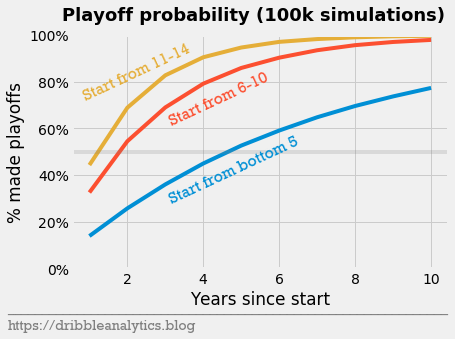

In [26]:
plt.style.use('fivethirtyeight')

four_chain_ten_years, ax = plt.subplots()

x = range(1, 11)

ax.plot(x, five_playoff)
ax.plot(x, ten_playoff)
ax.plot(x, lottery_playoff)

ax.set_xlabel('Years since start')
ax.set_ylabel('% made playoffs')

four_chain_ten_years.suptitle("Playoff probability (100k simulations)", weight = 'bold', size = 18)

ax.set_ylim([0, 1])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.axhline(y = .5, alpha = .2, color = 'grey')

four_chain_ten_years.text(x = 0.3, y = 0.5,
    s = 'Start from bottom 5',
    fontsize = 16, fontname = 'Rockwell', color = 'C0', horizontalalignment='left', rotation = 25)

four_chain_ten_years.text(x = 0.3, y = 0.72,
    s = 'Start from 6-10',
    fontsize = 16, fontname = 'Rockwell', color = 'C1', horizontalalignment='left', rotation = 25)

four_chain_ten_years.text(x = 0.1, y = 0.82,
    s = 'Start from 11-14',
    fontsize = 16, fontname = 'Rockwell', color = 'C2', horizontalalignment='left', rotation = 25)

four_chain_ten_years.text(x = -0.07, y = -0.08,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

four_chain_ten_years.text(x = -0.07, y = -.14,
    s = 'https://dribbleanalytics.blog',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

four_chain_ten_years.savefig('four-chain-ten-years.png', dpi = 400, bbox_inches = 'tight')

# Create 7-state Markov chain

In [27]:
df_7_chain = pd.read_csv('7_state_chain_data.csv')
df_7_chain = df_7_chain.fillna(0)

df_7_chain.head()

,team,year_1,year_2,year_3,year_4,year_5,year_6,year_7,year_8,year_9,...,year_25,year_26,year_27,year_28,year_29,year_30,year_31,year_32,year_33,year_34
0,Atlanta Hawks,2,4,4,4,3,2,3,2,3,...,4.0,4.0,4.0,3.0,3.0,3.0,5.0,4.0,3.0,1.0
1,Boston Celtics,7,7,6,6,3,3,4,4,3,...,4.0,6.0,4.0,5.0,3.0,1.0,3.0,3.0,5.0,5.0
2,New Jersey/Brooklyn Nets,3,3,1,1,1,1,1,3,3,...,2.0,1.0,2.0,2.0,3.0,4.0,3.0,1.0,1.0,2.0
3,Charlotte Bobcats/Hornets,1,1,1,2,4,2,3,2,3,...,2.0,3.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Chicago Bulls,3,3,3,4,5,5,7,7,7,...,3.0,3.0,5.0,3.0,4.0,3.0,4.0,2.0,3.0,2.0


In [28]:
trans_name = combo_maker(7)
trans_list = prob_initializer(trans_name)

trans_name = list_to_matrix(trans_name, 7)

In [29]:
trans_matrix = list_to_matrix(trans_list, 7)
trans_matrix = state_count(df_7_chain, trans_matrix)

In [30]:
trans_prob_matrix = state_prob(trans_matrix)

In [31]:
trans_prob_matrix

[[0.47560975609756095,
  0.3780487804878049,
  0.09146341463414634,
  0.042682926829268296,
  0.006097560975609756,
  0.0,
  0.006097560975609756],
 [0.21428571428571427,
  0.37815126050420167,
  0.2689075630252101,
  0.09663865546218488,
  0.03361344537815126,
  0.008403361344537815,
  0.0],
 [0.08712121212121213,
  0.25,
  0.38257575757575757,
  0.17045454545454544,
  0.07954545454545454,
  0.022727272727272728,
  0.007575757575757576],
 [0.03787878787878788,
  0.14393939393939395,
  0.3787878787878788,
  0.1893939393939394,
  0.12878787878787878,
  0.06818181818181818,
  0.05303030303030303],
 [0.0,
  0.09090909090909091,
  0.3484848484848485,
  0.22727272727272727,
  0.16666666666666666,
  0.09090909090909091,
  0.07575757575757576],
 [0.0,
  0.06060606060606061,
  0.18181818181818182,
  0.30303030303030304,
  0.18181818181818182,
  0.12121212121212122,
  0.15151515151515152],
 [0.030303030303030304,
  0.0,
  0.12121212121212122,
  0.21212121212121213,
  0.06060606060606061,
  0.18

In [32]:
bottom_cf = playoff_prob_list(0, 5, trans_name, trans_prob_matrix, 4, 100000)
lottery_cf = playoff_prob_list(1, 5, trans_name, trans_prob_matrix, 4, 100000)
first_round_cf = playoff_prob_list(2, 5, trans_name, trans_prob_matrix, 4, 100000)

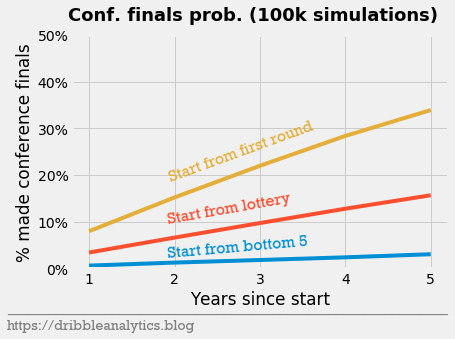

In [33]:
plt.style.use('fivethirtyeight')

seven_chain_five_years, ax = plt.subplots()

x = range(1, 6)

ax.plot(x, bottom_cf)
ax.plot(x, lottery_cf)
ax.plot(x, first_round_cf)

ax.set_xlabel('Years since start')
ax.set_ylabel('% made conference finals')

seven_chain_five_years.suptitle("Conf. finals prob. (100k simulations)", weight = 'bold', size = 18)

ax.set_ylim([0, .5])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.axhline(y = .5, alpha = .2, color = 'grey')

seven_chain_five_years.text(x = 0.3, y = 0.15,
    s = 'Start from bottom 5',
    fontsize = 16, fontname = 'Rockwell', color = 'C0', horizontalalignment='left', rotation = 5)

seven_chain_five_years.text(x = 0.3, y = 0.3,
    s = 'Start from lottery',
    fontsize = 16, fontname = 'Rockwell', color = 'C1', horizontalalignment='left', rotation = 10)

seven_chain_five_years.text(x = 0.3, y = 0.55,
    s = 'Start from first round',
    fontsize = 16, fontname = 'Rockwell', color = 'C2', horizontalalignment='left', rotation = 20)

seven_chain_five_years.text(x = -0.07, y = -0.08,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

seven_chain_five_years.text(x = -0.07, y = -.14,
    s = 'https://dribbleanalytics.blog',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

seven_chain_five_years.savefig('seven-chain-five-years.png', dpi = 400, bbox_inches = 'tight')

In [34]:
bottom_cf = playoff_prob_list(0, 10, trans_name, trans_prob_matrix, 4, 100000)
lottery_cf = playoff_prob_list(1, 10, trans_name, trans_prob_matrix, 4, 100000)
first_round_cf = playoff_prob_list(2, 10, trans_name, trans_prob_matrix, 4, 100000)

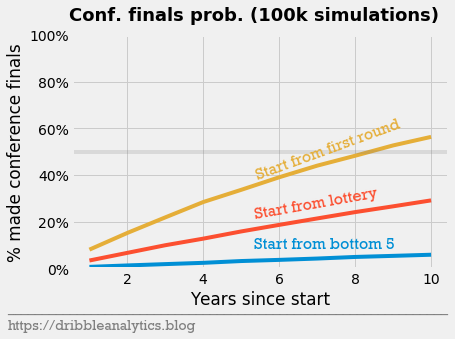

In [35]:
plt.style.use('fivethirtyeight')

seven_chain_ten_years, ax = plt.subplots()

x = range(1, 11)

ax.plot(x, bottom_cf)
ax.plot(x, lottery_cf)
ax.plot(x, first_round_cf)

ax.set_xlabel('Years since start')
ax.set_ylabel('% made conference finals')

seven_chain_ten_years.suptitle("Conf. finals prob. (100k simulations)", weight = 'bold', size = 18)

ax.set_ylim([0, 1])
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

ax.axhline(y = .5, alpha = .2, color = 'grey')

seven_chain_ten_years.text(x = 0.5, y = 0.14,
    s = 'Start from bottom 5',
    fontsize = 16, fontname = 'Rockwell', color = 'C0', horizontalalignment='left', rotation = 0)

seven_chain_ten_years.text(x = 0.5, y = 0.32,
    s = 'Start from lottery',
    fontsize = 16, fontname = 'Rockwell', color = 'C1', horizontalalignment='left', rotation = 10)

seven_chain_ten_years.text(x = 0.5, y = 0.56,
    s = 'Start from first round',
    fontsize = 16, fontname = 'Rockwell', color = 'C2', horizontalalignment='left', rotation = 20)

seven_chain_ten_years.text(x = -0.07, y = -0.08,
    s = '_______________________________________________________________',
    fontsize = 14, color = 'grey', horizontalalignment='left')

seven_chain_ten_years.text(x = -0.07, y = -.14,
    s = 'https://dribbleanalytics.blog',
    fontsize = 14, fontname = 'Rockwell', color = 'grey', horizontalalignment='left')

seven_chain_ten_years.savefig('seven-chain-ten-years.png', dpi = 400, bbox_inches = 'tight')